<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Prediction-Research/blob/main/TSLA_Hot_Winters_Exponential_Smoothning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

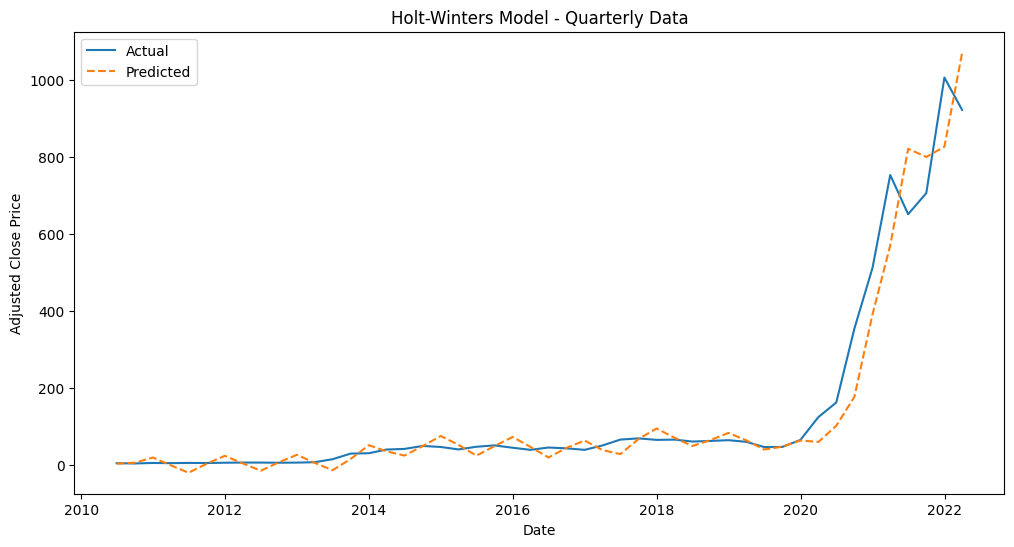

Quarterly Data - MAE: 35.04595538938201
Quarterly Data - RMSE: 62.89993723067406
Quarterly Forecast: 2022-06-30    1028.233492
2022-09-30    1116.034267
2022-12-31    1217.808307
2023-03-31    1297.812935
Freq: Q-DEC, dtype: float64


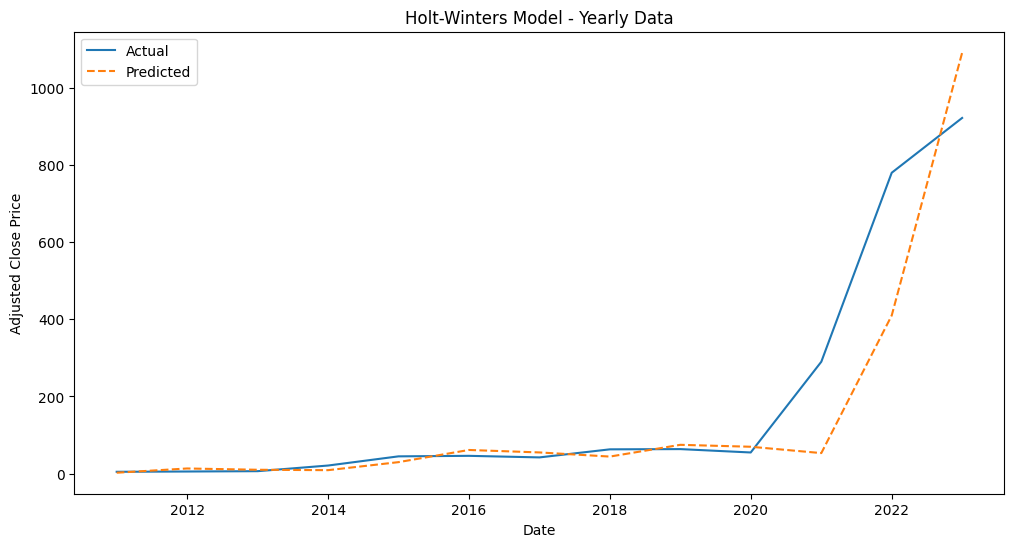

Yearly Data - MAE: 68.44735891291914
Yearly Data - RMSE: 131.01823131393388
Yearly Forecast: 2023-12-31    1148.297810
2024-12-31    1373.657621
Freq: A-DEC, dtype: float64


In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/TSLA.csv')

# Convert Date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to get quarterly and yearly data
quarterly_data = data['Adj Close'].resample('Q').mean()
yearly_data = data['Adj Close'].resample('Y').mean()

# Fit Holt-Winters model on quarterly data (with seasonality)
hw_model_quarterly = ExponentialSmoothing(quarterly_data, seasonal='add', trend='add', seasonal_periods=4)
hw_model_quarterly_fit = hw_model_quarterly.fit()
quarterly_forecasted_values = hw_model_quarterly_fit.fittedvalues

# Forecast the next 4 quarters (1 year ahead)
forecast_quarterly = hw_model_quarterly_fit.forecast(steps=4)

# Calculate error metrics for quarterly data
mae_quarterly = mean_absolute_error(quarterly_data, quarterly_forecasted_values)
rmse_quarterly = np.sqrt(mean_squared_error(quarterly_data, quarterly_forecasted_values))

# Plot actual vs predicted for quarterly data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data, label='Actual')
plt.plot(quarterly_data.index, quarterly_forecasted_values, label='Predicted', linestyle='--')
plt.title('Holt-Winters Model - Quarterly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Quarterly Data - MAE:", mae_quarterly)
print("Quarterly Data - RMSE:", rmse_quarterly)
print("Quarterly Forecast:", forecast_quarterly)

# Fit Holt-Winters model on yearly data (without seasonality)
hw_model_yearly = ExponentialSmoothing(yearly_data, trend='add', seasonal=None)
hw_model_yearly_fit = hw_model_yearly.fit()
yearly_forecasted_values = hw_model_yearly_fit.fittedvalues

# Forecast the next 2 years
forecast_yearly = hw_model_yearly_fit.forecast(steps=2)

# Calculate error metrics for yearly data
mae_yearly = mean_absolute_error(yearly_data, yearly_forecasted_values)
rmse_yearly = np.sqrt(mean_squared_error(yearly_data, yearly_forecasted_values))

# Plot actual vs predicted for yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data, label='Actual')
plt.plot(yearly_data.index, yearly_forecasted_values, label='Predicted', linestyle='--')
plt.title('Holt-Winters Model - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Yearly Data - MAE:", mae_yearly)
print("Yearly Data - RMSE:", rmse_yearly)
print("Yearly Forecast:", forecast_yearly)
